In [1]:
import os
import numpy as np
import pandas as pd

# TODO: move such functions to a common utils folder
from spot_calling.utils import load_prep_slide

import liana as li

import plotnine as p9

data_dir = os.path.join('..', 'data', 'heart_visium')

In [2]:
# Rename to more informative names
full_names = {'Adipo': 'Adipocytes',
              'CM': 'Cardiomyocytes',
              'Endo': 'Endothelial',
              'Fib': 'Fibroblasts',
              'PC': 'Pericytes',
              'prolif': 'Proliferating',
              'vSMCs': 'Vascular_SMCs',
              }

In [3]:
metadata = pd.read_csv(os.path.join("spot_calling", "visium_meta.csv"))

In [4]:
target_metrics = {}
interactions = {}

In [5]:
# scan names of all datasets
dataset_names = [f for f in metadata.slide_name]


In [6]:
for dataset in dataset_names:
    
    print(f"Processing {dataset}")
    
    adata = load_prep_slide(path=data_dir, slide=dataset + '.h5ad', bandwidth=150, set_diag=False, cutoff=0.01)
    # but only for the ones that are in the data
    adata.obsm['compositions'].columns = [full_names.get(c, c) for c in adata.obsm['compositions'].columns]
    
    comps = li.ut.obsm_to_adata(adata, 'compositions')
    comps = comps[:, comps.var.index!='Proliferating'].copy() # exclude proliferating

    misty = li.mt.MistyData({"intra": comps, "inter": comps})
    misty(model='linear', verbose=True, bypass_intra=True)
    
    interactions[dataset] = misty.uns['interactions'].copy()
    interactions[dataset]['sample'] = dataset
    target_metrics[dataset] = misty.uns['target_metrics'].copy()
    target_metrics[dataset]['sample'] = dataset

Processing AKK001_157785


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]


Processing AKK002_157779


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:02<00:00,  4.51it/s]


Processing AKK002_157781


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:02<00:00,  3.84it/s]


Processing AKK002_157782


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]


Processing AKK003_157775


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]


Processing AKK003_157777


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:02<00:00,  4.79it/s]


Processing AKK004_157772


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:02<00:00,  4.67it/s]


Processing AKK006_157771


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  5.21it/s]


Processing Visium_1_CK279


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  8.50it/s]


Processing Visium_10_CK288


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]


Processing Visium_11_CK289


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  8.86it/s]


Processing Visium_12_CK290


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Processing Visium_13_CK291


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  7.08it/s]


Processing Visium_14_CK292


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Processing Visium_15_CK293


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  7.24it/s]


Processing Visium_16_CK294


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  7.40it/s]


Processing Visium_17_CK295


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]


Processing Visium_18_CK296


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  6.03it/s]


Processing Visium_19_CK297


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  5.51it/s]


Processing Visium_2_CK280


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  6.75it/s]


Processing Visium_20_CK298


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Processing Visium_3_CK281


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Processing Visium_4_CK282


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  7.30it/s]


Processing Visium_5_CK283


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  6.18it/s]


Processing Visium_6_CK284


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  5.47it/s]


Processing Visium_7_CK285


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]


Processing Visium_8_CK286


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  8.24it/s]


Processing Visium_9_CK287


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: Vascular_SMCs: 100%|██████████| 10/10 [00:01<00:00,  5.20it/s]


In [ ]:
import gc
gc.collect()

In [9]:
interactions = pd.concat(interactions, ignore_index=True)

In [17]:
interactions = interactions.merge(metadata, left_on='sample', right_on='slide_name')

In [11]:
target_metrics = pd.concat(target_metrics, ignore_index=True)
target_metrics = target_metrics.merge(metadata, left_on='sample', right_on='slide_name')

In [12]:
def plot_target_metrics(misty=None,
                        stat=None,
                        target_metrics = None,
                        top_n = None,
                        ascending = False,
                        key = None,
                        filterby = None,
                        filter_lambda: callable = None,
                        aggregate_fun=None,
                        figure_size: tuple = (5,5), # NOTE change this to be symmetrical
                        return_fig: bool = True):
    
    if target_metrics is not None:
        target_metrics = target_metrics.copy()
    elif misty is not None:
        target_metrics = misty.uns['target_metrics'].copy()
    else:
        raise ValueError("Either provide a misty object or target_metrics")
    
    if stat is None:
        raise ValueError("Provide a statistic to plot")
    
    if filterby is not None:
        msk = target_metrics[filterby].apply(filter_lambda)
        target_metrics = target_metrics[msk]
    if top_n is not None:
        target_metrics = target_metrics.sort_values(stat, ascending=ascending, key=key).head(top_n)
    
    # get order of target by decreasing intra.R2
    if aggregate_fun is not None:
        targets = target_metrics.groupby(['target']).agg({stat: aggregate_fun}).reset_index()
    else:
        targets = target_metrics.copy()
        
    targets = targets.sort_values(by=stat, ascending=False)['target']
    # targets as categorical variable
    target_metrics['target'] = pd.Categorical(target_metrics['target'],
                                              categories=targets,
                                              ordered=True)
        

    p = (p9.ggplot(target_metrics, p9.aes(x='target', y=stat)) +
         p9.geom_boxplot() if aggregate_fun is not None else p9.geom_point(size=3))
    p = (p + p9.theme_bw() +
         p9.theme(axis_text_x=p9.element_text(rotation=90),
                  figure_size=figure_size) +
         p9.labs(x='Target')
         )

    if return_fig:
        return p
    p.draw()

In [13]:
tm_ctrl = target_metrics[target_metrics['major_labl']=='CTRL'].copy()
tm_iz = target_metrics[target_metrics['major_labl']=='IZ'].copy()
tm_rz = target_metrics[~target_metrics['major_labl'].isin(['CTRL', 'IZ'])].copy()


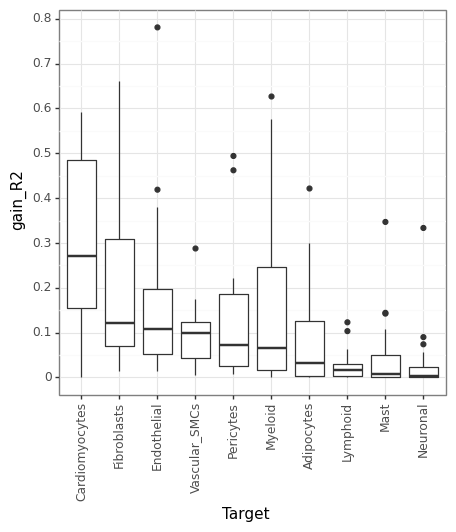

<ggplot: (8783334770253)>

In [14]:
# ticks at 0.1
(plot_target_metrics(target_metrics=target_metrics, stat='gain_R2', aggregate_fun='median') +
    p9.scale_y_continuous(breaks=np.arange(0, 1, 0.1))
)

In [70]:
# keep targets with median gain_R2 > 0.05
targets = target_metrics.groupby(['target']).agg({'gain_R2': 'median'}).reset_index()
targets = targets[targets['gain_R2']>0.05]['target'].values

In [75]:
targets

array(['Cardiomyocytes', 'Endothelial', 'Fibroblasts', 'Myeloid',
       'Pericytes', 'Vascular_SMCs'], dtype=object)

In [61]:
def interactions_plot(misty= None,
                      interactions = None,
                      view = None,
                      top_n = None,
                      ascending = False,
                      key = None,
                      filterby = None,
                      filter_lambda: callable = None,
                      aggregate_fun = None,
                      figure_size: tuple = (7,5),
                      return_fig: bool = True):
    
    if target_metrics is not None:
        interactions = interactions.copy()
    elif misty is not None:
        interactions = misty.uns['target_metrics'].copy()
    else:
        raise ValueError("Either provide a misty object or `interactions`")
    if view is None:
        raise ValueError("Provide a `view` to plot")

    interactions = interactions[interactions['view'] == view]
    grouped = interactions.groupby('predictor')['importances'].apply(lambda x: x.isna().all())
    interactions = interactions[~interactions['predictor'].isin(grouped[grouped].index)]
    
    if aggregate_fun is not None:
        interactions = interactions.groupby(['target', 'predictor']).agg({'importances': aggregate_fun}).reset_index()
    
    if filterby is not None:
        top_interactions = interactions[interactions[filterby].apply(filter_lambda)]
        top_interactions = top_interactions.drop_duplicates(['target', 'predictor'])
    if top_n is not None:
        interactions = interactions.sort_values(by='importances', key=key, ascending=ascending)
        top_interactions = interactions.drop_duplicates(['target', 'predictor']).head(top_n)

    if (filterby is not None) or (top_n is not None):
        interactions = interactions[interactions['target'].isin(top_interactions['target']) &
                            interactions['predictor'].isin(top_interactions['predictor'])]

    p = (p9.ggplot(interactions,
                   p9.aes(x='predictor',
                          y='target',
                          fill='importances')
                   ) +
    p9.geom_tile() +
    p9.theme_minimal(base_size=12) +
    p9.theme(axis_text_x=p9.element_text(rotation=90),
             figure_size=figure_size) +
    p9.labs(x='Predictor', y='Target', fill='Importance')
    )

    if return_fig:
        return p
    p.draw()

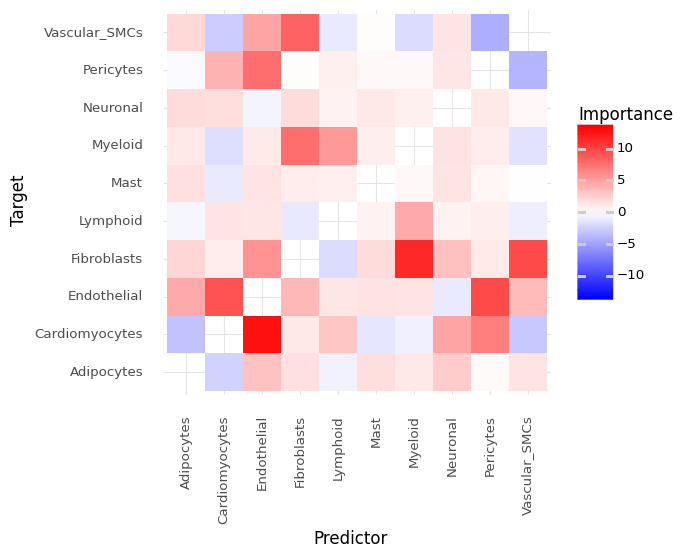

<ggplot: (8783321617919)>

In [74]:
(interactions_plot(interactions=interactions, view='inter', aggregate_fun='median', figure_size=(5,5)) +
    p9.scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limits=(-13, 13))
 )

In [110]:
# keep only interactions with median importance > 2
ints = interactions.groupby(['target', 'predictor']).agg({'importances': 'median'}).reset_index()
ints = ints[ints['importances'] > 0 ]
# keep only targets of interest
ints = ints[ints['target'].isin(targets)]

In [111]:
ints

,target,predictor,importances
10,Cardiomyocytes,Endothelial,12.139006
11,Cardiomyocytes,Fibroblasts,1.125898
12,Cardiomyocytes,Lymphoid,2.923217
15,Cardiomyocytes,Neuronal,4.586638
16,Cardiomyocytes,Pericytes,6.502392
18,Endothelial,Adipocytes,4.285902
19,Endothelial,Cardiomyocytes,8.744221
20,Endothelial,Fibroblasts,3.557055
21,Endothelial,Lymphoid,1.308701
22,Endothelial,Mast,1.422319


In [113]:
ints.to_csv('ct_interactions.csv')

Compare importances

In [101]:
interactions['group'] = interactions['major_labl'].copy()
interactions.loc[interactions['major_labl']=='CTRL', 'group'] = 'CTRL'
interactions.loc[interactions['major_labl']=='IZ', 'group'] = 'IZ'
interactions.loc[~interactions['major_labl'].isin(['CTRL', 'IZ']), 'group'] = 'RZ' # this myogenic?

In [102]:
groups = interactions['group'].unique()

In [103]:
from scipy.stats import ttest_ind

In [104]:
# Create a dictionary to store the t-test results
t_test_results = pd.DataFrame({'target':[], 'predictor':[], 'group1': [], 'group2': [], 't_statistic': [], 'p_value': []})

# Perform t-test for all combinations of groups
for target in interactions['target'].unique():
    for predictor in interactions['predictor'].unique():
        msk = (interactions['target'] == target) & (interactions['predictor'] == predictor)
        df = interactions[msk]
        for i in range(len(groups)):
            for j in range(i+1, len(groups)):
                group1 = groups[i]
                group2 = groups[j]

                # Extract data for the two groups
                data_group1 = df[df['group'] == group1]['importances']
                data_group2 = df[df['group'] == group2]['importances']

                # Perform t-test
                t_stat, p_value = ttest_ind(data_group1, data_group2)

                # Store results in the dictionary
                # key interates the row
                key = f"{target}_{predictor}_{group1}_{group2}"
                t_test_results.loc[key, 'group1'] = group1
                t_test_results.loc[key, 'group2'] = group2
                t_test_results.loc[key, 't_statistic'] = t_stat
                t_test_results.loc[key, 'p_value'] = p_value
                t_test_results.loc[key, 'target'] = target
                t_test_results.loc[key, 'predictor'] = predictor

In [105]:
t_test_results.sort_values(by='p_value').sort_values(by='t_statistic', ascending=False).head(20)

,target,predictor,group1,group2,t_statistic,p_value
Pericytes_Endothelial_IZ_CTRL,Pericytes,Endothelial,IZ,CTRL,3.139083,0.009424
Neuronal_Endothelial_RZ_IZ,Neuronal,Endothelial,RZ,IZ,2.993621,0.006693
Endothelial_Vascular_SMCs_IZ_CTRL,Endothelial,Vascular_SMCs,IZ,CTRL,2.593045,0.025002
Lymphoid_Myeloid_IZ_CTRL,Lymphoid,Myeloid,IZ,CTRL,2.490725,0.029997
Endothelial_Mast_RZ_CTRL,Endothelial,Mast,RZ,CTRL,2.470726,0.024362
Endothelial_Pericytes_IZ_CTRL,Endothelial,Pericytes,IZ,CTRL,2.390268,0.035844
Myeloid_Lymphoid_IZ_CTRL,Myeloid,Lymphoid,IZ,CTRL,2.279924,0.043542
Cardiomyocytes_Endothelial_RZ_IZ,Cardiomyocytes,Endothelial,RZ,IZ,2.219032,0.037108
Vascular_SMCs_Endothelial_IZ_CTRL,Vascular_SMCs,Endothelial,IZ,CTRL,2.188525,0.051100
Neuronal_Pericytes_IZ_CTRL,Neuronal,Pericytes,IZ,CTRL,2.165005,0.053238


Networkx Graph

In [106]:
import networkx as nx

In [107]:
g = nx.from_pandas_edgelist(ints, source='predictor', target='target', edge_attr=['importances'])

In [108]:
edges = g.edges()
colors = ['red' if g[u][v]['importances'] > 0 else 'blue' for u,v in edges]
weights = [abs(g[u][v]['importances']) for u,v in edges]
weights = np.log2(weights) + 0.5

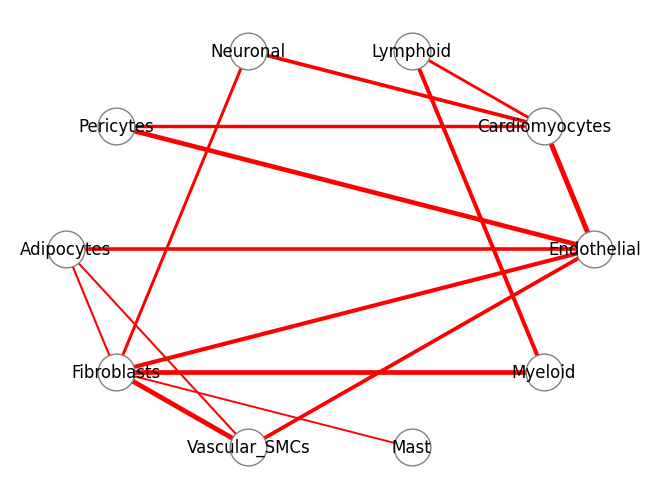

In [109]:
nx.draw(
    g,
    with_labels=True,
    edge_color=colors,
    width=weights,
    alpha=1,
    node_size=700,
    node_color='white',
    edgecolors='gray',
    # change graph layout to circle
    pos=nx.circular_layout(g),
)

{'Endothelial': array([ 0.22981845, -0.36637332]),
 'Adipocytes': array([0.53912796, 0.23681365]),
 'Mast': array([0.561814  , 0.88920443]),
 'Neuronal': array([-0.18358884,  0.02030562]),
 'Cardiomyocytes': array([-0.46052636, -0.53311968]),
 'Lymphoid': array([-1.        , -0.05588017]),
 'Pericytes': array([-0.00998357, -0.97501265]),
 'Fibroblasts': array([0.14052764, 0.37291182]),
 'Vascular_SMCs': array([ 0.77384683, -0.15889658]),
 'Myeloid': array([-0.59103611,  0.57004688])}